<a href="https://colab.research.google.com/github/arehvs/practice/blob/main/Case_study_of_MSD_over_the_years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is an statistical analysis of MS Dhoni's performance [Batting] over the years in the IPL.

# Points
# 1. Runs per season
# 2. Strikerate per season
# 3. Average
# 4. Boundary percentage
# 5. Team contribution.


In [4]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame.repr', False)
pd.set_option('max_colwidth', -1)

In [6]:
# importing data file from the drive

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV_files/ipl_ball_by_ball_data.csv')

In [7]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [11]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
200658,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.3,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200659,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.2,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200660,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.1,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200661,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,8.4,Sunrisers Hyderabad,Rajasthan Royals,KS Williamson,V Shankar,C Sakariya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200662,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.6,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,RP Meredith,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Creating MSD data frame from the df

msd_df = df[df['striker'] == 'MS Dhoni']

In [14]:
msd_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
556,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN
557,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1817,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.4,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Total number of runs scored by MSD in IPL upto '2021-05-02'

sum(msd_df.runs_off_bat)

4669

In [16]:
# Innings he played
msd_df.innings.unique()

array([1, 2])

In [19]:
# Seasons
msd_df.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

In [20]:
# Teams he played
msd_df.batting_team.unique()

array(['Chennai Super Kings', 'Rising Pune Supergiants',
       'Rising Pune Supergiant'], dtype=object)

In [27]:
# Runs per season

runs_per_season = pd.DataFrame(msd_df.groupby('season')['runs_off_bat'].sum())

In [28]:
runs_per_season

,runs_off_bat
season,
2008,414
2009,332
2010,287
2011,392
2012,358
2013,461
2014,371
2015,372
2016,284


In [29]:
# balls per season
balls_per_season = pd.DataFrame(msd_df.groupby('season')['ball'].count())

In [30]:
balls_per_season

,ball
season,
2008,319
2009,270
2010,215
2011,247
2012,283
2013,298
2014,258
2015,309
2016,220


In [37]:
# combined runs and balls per season

season_df = runs_per_season.merge(balls_per_season, on='season', how='left').reset_index()

In [38]:
season_df

,season,runs_off_bat,ball
0,2008,414,319
1,2009,332,270
2,2010,287,215
3,2011,392,247
4,2012,358,283
5,2013,461,298
6,2014,371,258
7,2015,372,309
8,2016,284,220
9,2017,290,261


In [39]:
season_df["strikerate"] = 100*(season_df['runs_off_bat']/season_df['ball'])

In [40]:
season_df

,season,runs_off_bat,ball,strikerate
0,2008,414,319,129.780564
1,2009,332,270,122.962963
2,2010,287,215,133.488372
3,2011,392,247,158.704453
4,2012,358,283,126.501767
5,2013,461,298,154.697987
6,2014,371,258,143.798450
7,2015,372,309,120.388350
8,2016,284,220,129.090909
9,2017,290,261,111.111111


In [41]:
plt.figure(figsize=[16,8])

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

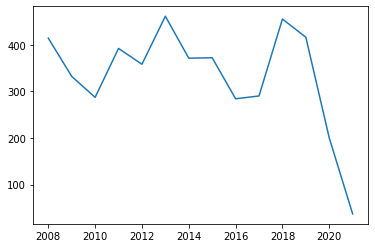

In [43]:
plt.plot(season_df['season'],season_df['runs_off_bat'])